In [144]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) # 提取频率出现最高的top10000的features


技巧:
1. 训练数据和测试数据的比例为1:1
2. 提取重要的特征属性，有助于减少数据规模，加快训练速度

In [145]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

技巧:
1. 向量化训练数据和测试数据
2. 训练数据和数据结果标签也需要向量化

In [146]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [147]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


知识:
1. Dense, 全连接层，一层
2. relu(dot(W, input) + b)
3. Dense的unit参数为16，以为着有一个隐藏单元，意味着W为(input_dimension, 16)的矩阵
4. relu为激活函数，x > 0 ? x : 0
5. sigmoid为最后一层的激活函数，输出结果在[0, 1]之间, 面对一个二分分类问题，所以用sigmoid函数
6. relu的替换函数还有prelu, elu

In [148]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

知识:
1. 损失函数: 针对二分分类问题，一般使用binary_crossentropy，也可以使用mean_squared_error；看最终的效果
2. 优化函数: optimizers.RMSprop(lr=0.001)
3. 度量函数: 精度

In [149]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

技巧:
1. 校验数据集合(10000)/测试数据集(15000) = 2/3

In [150]:
history = model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=20, 
                    batch_size=512, 
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 227us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8685
Epoch 2/20
15000/15000 [==============================] - 2s 104us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 2s 102us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3087 - val_acc: 0.8712
Epoch 4/20
15000/15000 [==============================] - 2s 103us/step - loss: 0.1750 - acc: 0.9438 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 2s 102us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 2s 103us/step - loss: 0.1150 - acc: 0.9651 - val_loss: 0.3165 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 2s 103us/step - loss: 0.0980 - acc: 0.9707 - val_loss: 0.3127 - 

知识:
1. 校验数据集: 验证训练数据集模型的精度
2. epochs: 迭代次数
3. batch_size: 分批对训练数据进行训练，由于数据级别很大，占用内存大，所以分批次。batch size增大到一定量，梯度下降方向基本不会再变化

In [151]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

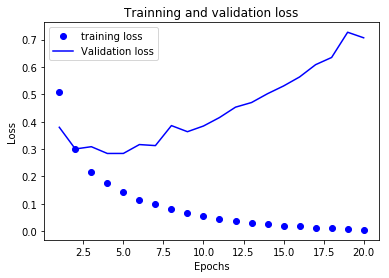

In [152]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'bo', label="training loss")
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Trainning and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

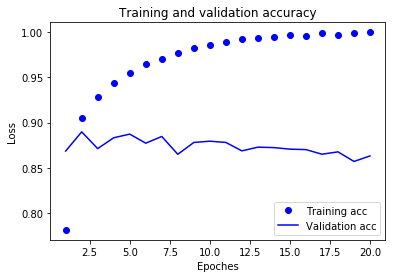

In [153]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [154]:
model.predict(x_test)

array([[0.0041433 ],
       [0.99999976],
       [0.8627137 ],
       ...,
       [0.0013591 ],
       [0.00659024],
       [0.6723464 ]], dtype=float32)

# 测试：
1. 更改layer的数量：当有3层layer的时候，减少一层，loss的过拟合减轻；增加一层，loss的过拟合加重。
2. 增大每一个layer的unit数量到32，64：loss以及acc的过拟合加剧
2. 损失函数换成mse; 损失的过拟合减轻；精度变化不大，有稍微降低
3. relu换成tanh；relu要比tanh优秀，tanh加重了loss的过拟合

# 总结:
1. 必须得把原始的数据转化为张量，能够在神经网络中使用.
2. relu激活函数被广泛使用，包括分类问题
3. 在二分问题中，最后一层，需要以包含一个unit的激活函数为sigmoid的层来结束
4. 由于是二分问题，所以损失函数为binary_crossentropy
5. rmsprop优化器已经足够好了，这个不用担心
6. 为了在训练集上获取更好的效果，模型会对未知的数据变得过拟合而表现更糟糕。所以需要保证检测数据是不同于训练集数据的
